https://www.digitalocean.com/community/tutorials/exploratory-data-analysis-python

# Exploratory Data Analysis using Data Visualization Techniques!

Exploratory data analysis is a way to better understand your data which helps in further Data preprocessing. And data visualization is key, making the exploratory data analysis process streamline and easily analyzing data using wonderful plots and charts.

# Data Visualization

Data Visualization represents the text or numerical data in a visual format, which makes it easy to grasp the information the data express. We, humans, remember the pictures more easily than readable text, so Python provides us various libraries for data visualization like matplotlib, seaborn, plotly, etc. In this tutorial, we will use Matplotlib and seaborn for performing various techniques to explore data using various plots.

# Exploratory Data Analysis

Creating Hypotheses, testing various business assumptions while dealing with any Machine learning problem statement is very important and this is what EDA helps to accomplish. There are various tootle and techniques to understand your data, And the basic need is you should have the knowledge of Numpy for mathematical operations and Pandas for data manipulation.



for demonstrating some of the techniques we will also use an inbuilt dataset of seaborn as tips data which explains the tips each waiter gets from different customers.

In [1]:
#Load the required libraries
import pandas as pd
import numpy as np
import seaborn as sns

#Load the data
df = pd.read_csv('titanic.csv')
#load_dataset
#df = load_dataset('titanic.csv')


FileNotFoundError: ignored

In [ ]:
#View the whole data
df

In [ ]:
#View the top 5 entries of data
df.head()

In [ ]:
#View the top 10 entries of data
df.head(10)

In [ ]:
#View the bottom 10 entries of data
df.tail(10)

# 1. Basic information about data - EDA

The **df.info()** function will give us the basic information about the dataset. For any data, it is good to start by knowing its information. Let’s see how it works with our data.



In [ ]:
#Basic information

df.info() #gives the basic information about the data or the variables inside the data

Using the above function, you can see no of rows and columns, the column names, the number of null values, datatypes, and memory usage as shown in the above outputs.

**Observation: Here we can see that there are some missing values in the ‘Age’, ‘Cabin’ and ‘Embarked’ columns. We will not be using the ‘Cabin’ column which has the most number of missing values. There are some columns that are not required in my analysis so we will be dropping them. **

In [ ]:
#Describe the data

df.describe() #gives the discriptive analysis

**Observation: From the above table, we can see that mean of the survived column is 0.38, but since this is not a complete dataset we cannot conclude on that.The count for the ‘Age’ column is 714, which means the dataset has some missing values. We will have to clean up the data before I start exploring.**

In [ ]:
df.columns.tolist()

# 2. Duplicate values

You can use the df.duplicate.sum() function to the sum of duplicate value present if any. It will show the number of duplicate values if they are present in the data.

In [ ]:
#Find the duplicates

df.duplicated().sum()

0

Well, the function returned ‘0’. This means, there is not a single duplicate value present in our dataset and it is a very good thing to know.

# 3. Unique values in the data

You can find the number of unique values in the particular column using unique() function in python.

In [ ]:
#unique values

print(df['pclass'].unique())

print(df['survived'].unique())

print(df['sex'].unique())

[3 1 2]
[0 1]
['male' 'female']


The unique() function has returned the unique values which are present in the data and it is pretty much cool!

# 4. Visualize the Unique counts

Yes, you can visualize the unique values present in the data. For this, we will be using the seaborn library. You have to call the sns.countlot() function and specify the variable to plot the count plot.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


AttributeError: ignored

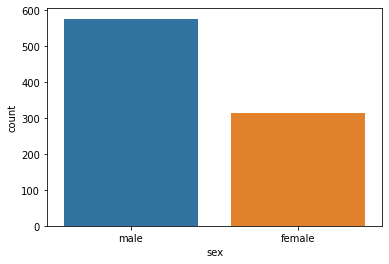

In [ ]:
#Plot the unique values

sns.countplot(df['sex']).unique()

Though EDA has two approaches, a blend of graphical and non-graphical will give you the bigger picture altogether.

# 5. Find the Null values

Finding the null values is the most important step in the EDA. As I told many a time, ensuring the quality of data is paramount. So, let’s see how we can find the null values.

In [ ]:
#Find null values

df.isnull().sum()

Unnamed: 0       0
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

we have some null values in the ‘Age’ and ‘Cabin’ variables. But, don’t worry. We will find a way to deal with them soon.

In [ ]:
#dropping column not in use and having maximum number of null values i.e. deck column
df = df.drop(['deck'], axis=1)
df.head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   sex          891 non-null    object 
 4   age          714 non-null    float64
 5   sibsp        891 non-null    int64  
 6   parch        891 non-null    int64  
 7   fare         891 non-null    float64
 8   embarked     889 non-null    object 
 9   class        891 non-null    object 
 10  who          891 non-null    object 
 11  adult_male   891 non-null    bool   
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(5), object(6)
memory usage: 92.4+ KB


#6. Replace the Null values

We got a **replace()** function to replace all the null values with a specific data. It is too good!

In [ ]:
#Replace null values

df.replace(np.nan,'0',inplace = True)

#Check the changes now
df.isnull().sum()

Unnamed: 0     0
survived       0
pclass         0
sex            0
age            0
sibsp          0
parch          0
fare           0
embarked       0
class          0
who            0
adult_male     0
deck           0
embark_town    0
alive          0
alone          0
dtype: int64

It is very easy to find and replace the null values in the data as shown. I have used 0 to replace null values. You can even opt for more meaningful methods such as mean or median.

#7. Know the datatypes

Knowing the datatypes which you are exploring is very important and an easy process too. Let’s see how it works.

In [ ]:
#Datatypes

df.dtypes

Unnamed: 0       int64
survived         int64
pclass           int64
sex             object
age             object
sibsp            int64
parch            int64
fare           float64
embarked        object
class           object
who             object
adult_male        bool
deck            object
embark_town     object
alive           object
alone             bool
dtype: object

You have to use the dtypes function for this a shown and you will get the datatypes of each attribute

#8. Filter the Data

We can filter the data based on some logic.

In [ ]:
#Filter data

df[df['pclass']==1].head()

,Unnamed: 0,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
1,1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
3,3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
6,6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
11,11,1,1,female,58.0,0,0,26.5500,S,First,woman,False,C,Southampton,yes,True
23,23,1,1,male,28.0,0,0,35.5000,S,First,man,True,A,Southampton,yes,True


You can see that the above code has returned only data values that belong to class 1.

#9. A box plot

We can create a box plot for any numerical column using a single line of code.

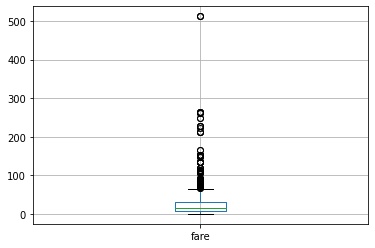

In [ ]:
#Boxplot

df[['fare']].boxplot()

#10. Correlation Plot - EDA

Finally, to find the correlation among the variables, we can make use of the correlation function. This will give you a fair idea of the correlation strength between different variables.

In [ ]:
#Correlation 

df.corr()

,Unnamed: 0,survived,pclass,sibsp,parch,fare,adult_male,alone
Unnamed: 0,1.000000,-0.005007,-0.035144,-0.057527,-0.001652,0.012658,0.041010,0.057462
survived,-0.005007,1.000000,-0.338481,-0.035322,0.081629,0.257307,-0.557080,-0.203367
pclass,-0.035144,-0.338481,1.000000,0.083081,0.018443,-0.549500,0.094035,0.135207
sibsp,-0.057527,-0.035322,0.083081,1.000000,0.414838,0.159651,-0.253586,-0.584471
parch,-0.001652,0.081629,0.018443,0.414838,1.000000,0.216225,-0.349943,-0.583398
fare,0.012658,0.257307,-0.549500,0.159651,0.216225,1.000000,-0.182024,-0.271832
adult_male,0.041010,-0.557080,0.094035,-0.253586,-0.349943,-0.182024,1.000000,0.404744
alone,0.057462,-0.203367,0.135207,-0.584471,-0.583398,-0.271832,0.404744,1.000000


This is the correlation matrix with the range from +1 to -1 where +1 is highly and positively correlated and -1 will be highly negatively correlated.

You can even visualize the correlation matrix using seaborn library as shown below.

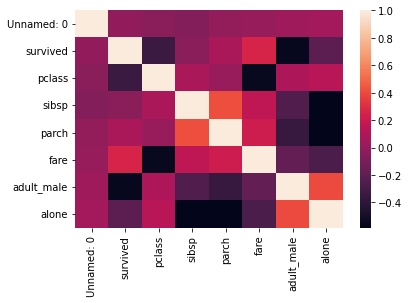

In [ ]:
#Correlation plot

sns.heatmap(df.corr())

#Another example for Heatmap

In [ ]:
import pandas as pd
iris = pd.read_csv('iris.csv', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])
print(iris.head())

FileNotFoundError: ignored

In [ ]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

# save load_iris() sklearn dataset to iris
# if you'd like to check dataset type use: type(load_iris())
# if you'd like to view list of attributes use: dir(load_iris())
iris = load_iris()

In [ ]:
# get correlation matrix
corr = iris.corr()
fig, ax = plt.subplots()
# create heatmap
im = ax.imshow(corr.values)

# set labels
ax.set_xticks(np.arange(len(corr.columns)))
ax.set_yticks(np.arange(len(corr.columns)))
ax.set_xticklabels(corr.columns)
ax.set_yticklabels(corr.columns)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
rotation_mode="anchor")

AttributeError: ignored

#DATA VISUALISATION

In [ ]:
import matplotlib.pyplot as plt

* We will be visualizing the survival chance vs the age, ticket class and embarkation.

* Let's look at the survival column first. The value of the Survived column is either 0 or 1, where 0 represents that the passenger is not survived while 1 represents the passages that survived. Now in order to find out the number of the two, we are going to employ groupby() method.

#**1. BARPLOTS**

In [ ]:
#What are the unique values in survivde column
df['survived'].unique()

array([0, 1])

In [ ]:
#What is the frequency or count of each unique category in survived column
#Group the data frame by values in Survived column, and count the number of occurrences of each group.
survived_count = df.groupby('survived')['survived'].count()
survived_count

survived
0    549
1    342
Name: survived, dtype: int64

In [ ]:
(survived_count.values/ survived_count.values.sum())*100

array([61.61616162, 38.38383838])

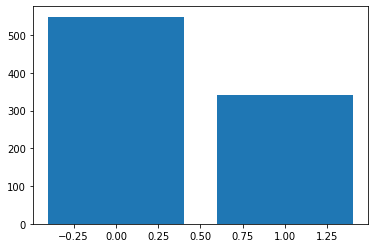

In [ ]:
#Lets plot a barplot to visualise the distribution of survived column
plt.bar(survived_count.index, survived_count.values)
plt.show()

In [2]:
#Lets add title the barplot
plt.title('Grouped by survival')
plt.bar(survived_count.index, survived_count.values)
plt.show()

NameError: ignored

In [3]:
#Lets add title the barplot
plt.title('Grouped by survival')
plt.xticks([0,1],['Not survived', 'Survived'])
plt.bar(survived_count.index, survived_count.values)
plt.show()


NameError: ignored

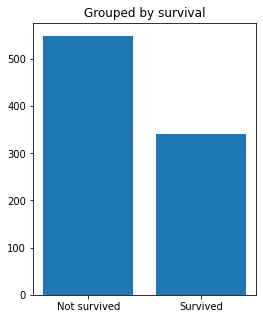

In [ ]:
#Lets adjust the size of the plot
plt.figure(figsize=(4,5))
plt.title('Grouped by survival')
plt.xticks([0,1],['Not survived', 'Survived'])
plt.bar(survived_count.index, survived_count.values)
plt.show()

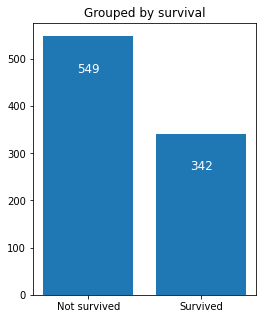

In [ ]:
#To add data labels or the barplots
plt.figure(figsize=(4,5))
plt.bar(survived_count.index, survived_count.values)
plt.title('Grouped by survival')
plt.xticks([0,1],['Not survived', 'Survived'])
for i, value in enumerate(survived_count.values):
    plt.text(i, value-70, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

Similarly, since we will look into the ticket class(Pclass), gender(Sex) and Embarkation(Embarked) columns let's visualize them using gropupby() method and see the count value also.

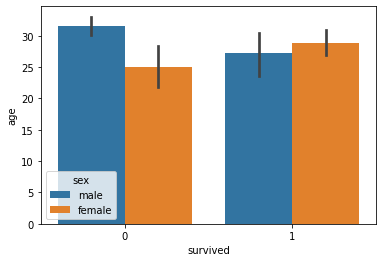

In [ ]:
sns.barplot(x= "survived" ,y= "age", data= df,hue='sex')
#sns.barplot(survived_count.index, survived_count.values)

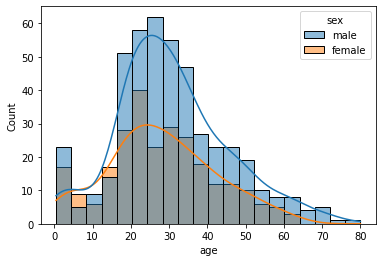

In [ ]:
sns.histplot(x='age', data=df, kde=True, hue='sex')
 
plt.show()

#2. PIE CHARTS (For Ticket Class(Pclass))

In [4]:
# Group the data frame by classes in the pclass column, and count the number of occurrences of each group.
pclass_count = df.groupby('pclass')['pclass'].count()
pclass_count

NameError: ignored

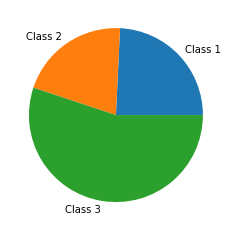

In [ ]:
#Lets visualise the distribution of ticket class (pclass) using a pie chart
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3'])
plt.show()

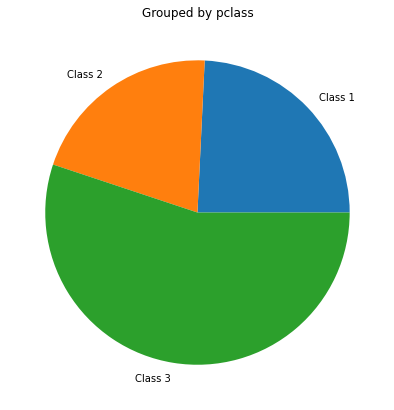

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Grouped by pclass')
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3'])
plt.show()

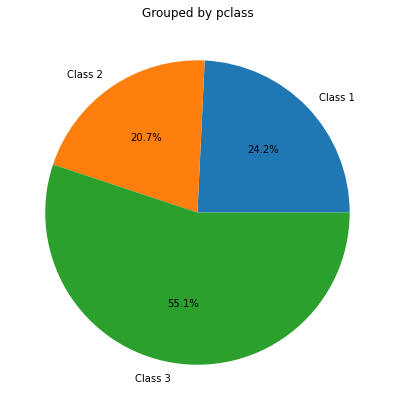

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Grouped by pclass')
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3'], 
 autopct='%1.1f%%')
plt.show()

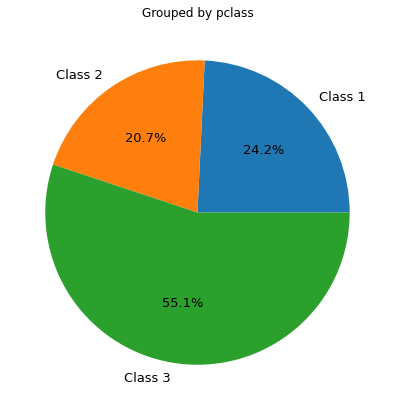

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Grouped by pclass')
plt.pie(pclass_count.values, labels=['Class 1', 'Class 2', 'Class 3'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

# For Gender

In [ ]:
# Group the data frame by classes in the pclass column, and count the number of occurrences of each group.
sex_count = df.groupby('sex')['sex'].count()
sex_count

sex
female    314
male      577
Name: sex, dtype: int64

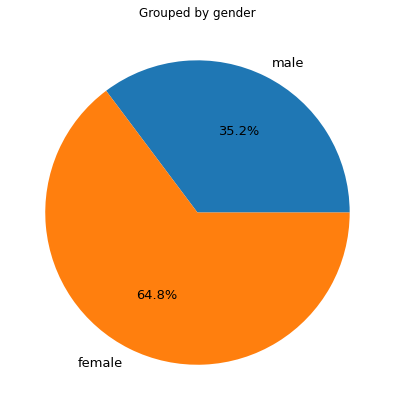

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Grouped by gender')
plt.pie(sex_count.values, labels=['male', 'female'], 
 autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

#For Port of Embarkation

In [ ]:
# Group the data frame by classes in the pclass column, and count the number of occurrences of each group.
embark_count = df.groupby('embarked')['embarked'].count()
embark_count

embarked
C    168
Q     77
S    644
Name: embarked, dtype: int64

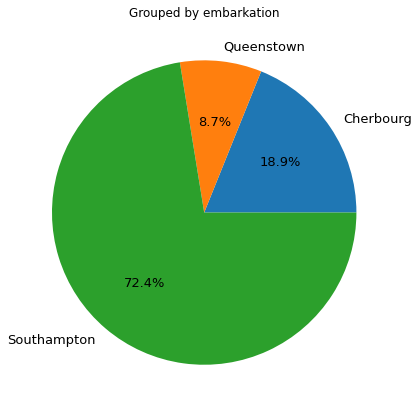

In [ ]:
plt.figure(figsize=(7,7))
plt.title('Grouped by embarkation')
plt.pie(embark_count.values, labels=['Cherbourg', 'Queenstown', 'Southampton'], 
        autopct='%1.1f%%', textprops={'fontsize':13})
plt.show()

#Now, let's visualize the following questions:

1. Did Sex play a role in Survival?
2. Did class played role in survival?
3. How does Embarkation vary across different ports?


#1. Did Sex play a role in Survival?

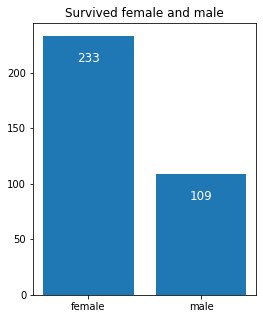

In [ ]:

#Survivial number according to gender or sex i.e. Male and Female
survived_sex = df.groupby('sex')['survived'].sum()
plt.figure(figsize=(4,5))
plt.bar(survived_sex.index, survived_sex.values)
plt.title('Survived female and male')
for i, value in enumerate(survived_sex.values):
    plt.text(i, value-20, str(value), fontsize=12, color='white',
             horizontalalignment='center', verticalalignment='center')
plt.show()

#2. Did class played role in survival?

Here we see the survival rate across all the classes. We can do this by taking the sum of survived passengers for each class and dividing it by the total number of passengers for that class and multiplying by 100. Here, we will use the pandas groupby() function to segregate passengers according to their class.

In [ ]:
#sns.plt.hist(df_cleaned.groupby(['Pclass', 'Survived', 'Sex']).size())
grouped_by_pclass = df.groupby(['pclass', 'survived', 'sex'])
grouped_by_pclass.size()

pclass  survived  sex   
1       0         female      3
                  male       77
        1         female     91
                  male       45
2       0         female      6
                  male       91
        1         female     70
                  male       17
3       0         female     72
                  male      300
        1         female     72
                  male       47
dtype: int64

In [ ]:
df.groupby(['pclass'])['survived'].sum()/df.groupby(['pclass'])['survived'].count()*100

pclass
1    62.962963
2    47.282609
3    24.236253
Name: survived, dtype: float64

Here, we can see that Class did play role in the survival of the passengers.


#3. FACTOR PLOTS (BARPLOTS FACTORED BY PCLASS)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:3723: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


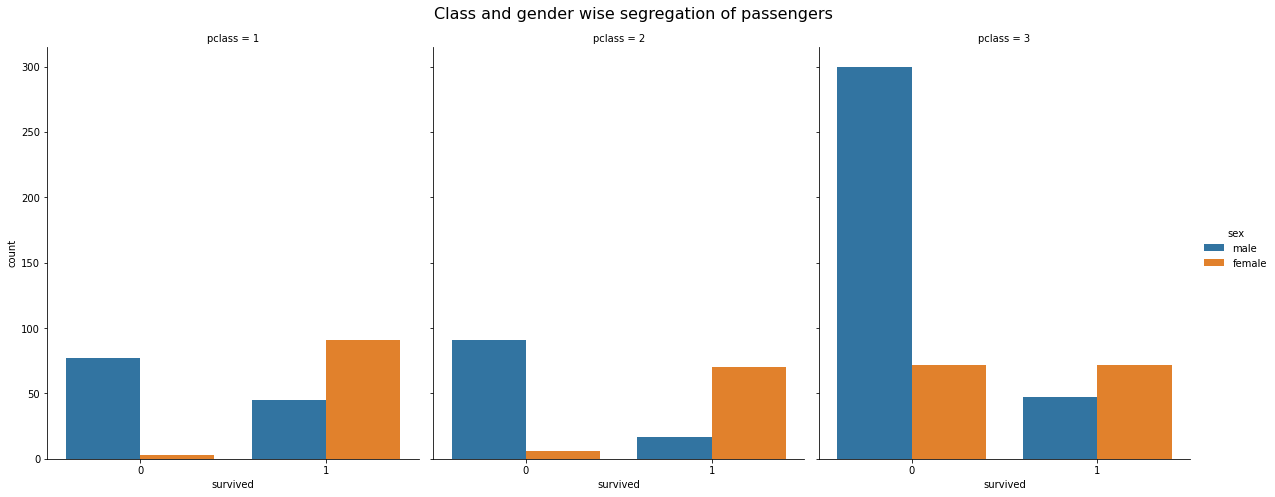

In [ ]:
sns.factorplot('survived', col='pclass', hue='sex', data=df, kind='count', size=7, aspect=.8)
plt.subplots_adjust(top=0.9)
plt.suptitle('Class and gender wise segregation of passengers', fontsize=16)
plt.show()

From the above visualization, we can see that class played an important for the Survival of Male and Female passengers. 

#3. How does Embarkation vary across different ports?

We segregate the passengers according to the Port of Embarkation and visualize it.


#4.MUTIPLE SCATTER PLOTS

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


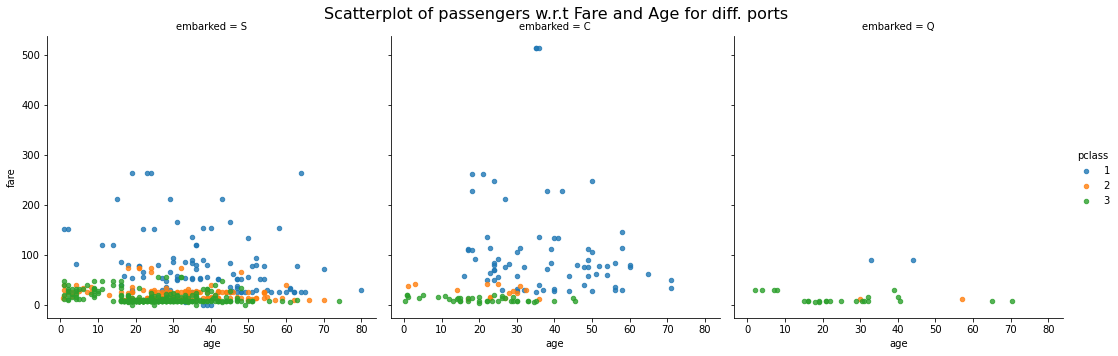

In [ ]:
sns.lmplot('age', 'fare', data= df, fit_reg=False, hue="pclass", col="embarked", scatter_kws={"marker": ".", "s": 20})
plt.subplots_adjust(top=0.9)
plt.suptitle('Scatterplot of passengers w.r.t Fare and Age for diff. ports', fontsize=16)
plt.show()

From the above visualization, we can see that class played an important for the Survival of Male and Female passengers. 

* Hence, we can see that the change of survival did vary with different factors such as gender, embarkation and ticket class. 

* In gender, we see that women had higher chances of survival. 

* In the ticket visualization, we can see that people in Class 3 had a lower chance of survival and the people in class 1 had a higher chance of survival. 

* There are some limitations in this dataset such as missing values for some attributes of passengers. This is not in any form an exhaustive study. More can be done on this data set.